<a href="https://colab.research.google.com/github/vpagonis/Python-Codes/blob/main/fadedsample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

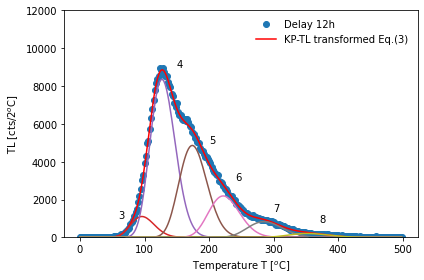

In [2]:
#  deconvolution of microcline data after 40 Gy
#  with optimal number of peaks N=8
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable 
import warnings
warnings.filterwarnings("ignore")
import requests

# read data file from GitHub
url='https://github.com/vpagonis/Python-Codes/raw/main/data/KCdelay43200.txt'
response=requests.get(url)
a=response.text
b=np.array(list(map(float,a.strip("[]").split())))
data=b.reshape(-1,2)

x_data,y_data = data[:, 0]+273.15, data[:, 1]
z,   kB =1.8, 8.617E-5  
def TL(T, B,Tmax,En,rho):
    fm=4.90537*rho**1.21038  
    Fm=np.log(1+(1/fm)*(1-2*kB*T/En))
    F=np.log(1+(1/fm)*((T/Tmax)**2.0)*np.exp(-En*(Tmax-T)/\
    (kB*T*Tmax))*(1-2*kB*T/En))
    return np.abs(B)*np.exp(-En*(Tmax-T)/(kB*T*Tmax))*\
    ((F/Fm)**2.0)*\
    np.exp(-rho*(F**3.0)-F)/np.exp(-rho*(Fm**3.0)-Fm)   
def total_TL(T, *inis): 
    u=np.array([0 for i in range(len(x_data))])
    Bs, Tmaxs=    inis[0:nPks],inis[nPks:2*nPks]
    for i in range(nPks):
        u=u+TL(T,Bs[i],Tmaxs[i],Ens[i],rho)
    return u
nPks=8
rho=.012952
Ens=[7.03425754e-01, 8.32183629e-01, 9.01598651e-01, 1.00700000e+00,
   1.13148391e+00, 1.25446161e+00, 1.41721608e+00, 1.57500000e+00]
Tmaxs=[283.0,331.0,359.0,399.0,447.0,493.0,555,615]
Tmaxlow=Tmaxs
Tmaxhigh=[x+10 for x in Tmaxs]
imaxs=[1e6]*8
imaxlow=[0 for x in imaxs]
imaxhigh=[10*x for x in imaxs]
inis=imaxs+Tmaxs
params, params_covariance = optimize.curve_fit(total_TL,x_data,y_data,\
p0=inis,bounds=(imaxlow+Tmaxlow,imaxhigh+Tmaxhigh))
plt.plot(data[:, 0], y_data, 'o',\
label=r'Delay 12h');
plt.plot(data[:, 0], total_TL(x_data, *params),c='r',\
label='KP-TL transformed Eq.(3)');
for i in range(0,nPks):
     plt.plot(data[:, 0],TL(x_data, params[i],\
     params[i+nPks],Ens[i],rho));
plt.text(60,1000,'3');
plt.text(150,9000,'4');
plt.text(200,5000,'5');
plt.text(240,3000,'6');
plt.text(300,1400,'7');
plt.text(370,800,'8');
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.ylim(0,12000); 
plt.ylabel('TL [cts/2$^{o}$C]');
plt.xlabel(r'Temperature T [$^{o}$C]');
plt.tight_layout()
res=total_TL(x_data, *params)-y_data
FOM=round(100*np.sum(abs(res))/np.sum(y_data),2)
myTable = PrettyTable(["B1", "B2", "B3", "B4","B5","rho'"]) 
B1,B2,B3,B4,B5, rho=format(params[0],"10.2E"),format(params[1],\
"10.2E"),format(params[2],"10.2E"),format(params[3],"10.2E"),\
 format(params[4],"10.2E"),round(params[5],5)
plt.show()